In [1]:
from PIL import Image


image_path = 'basemodelado.jpeg'
image = Image.open(image_path)

# Convertir a blanco y negro
bw_image = image.convert('L')

# Guardar la imagen convertida
bw_image.save('basemodelado_bw.jpeg')
bw_image.show()


In [4]:
bw_image.size


(960, 1280)

In [6]:
import numpy as np
bw_array = np.array(bw_image)


bw_array.shape

(1280, 960)

In [9]:
bw_image.show()

In [8]:
from PIL import Image
import numpy as np

image_path = 'basemodelado_bw.jpeg'
image = Image.open(image_path).convert('L')
image_array = np.array(image)

# Extraer puntos donde el color es negro (valor bajo en escala de grises)
threshold = 50  # Ajusta el umbral según necesites
target_points = np.column_stack(np.where(image_array < threshold))
target_points = np.hstack((target_points, np.zeros((target_points.shape[0], 1))))  # Añadir z=0

print("Total puntos objetivo:", target_points.shape[0])


Total puntos objetivo: 13519


In [15]:
from treesim import gen_simtree
from scipy.optimize import least_squares

# Normalizar ambas nubes de puntos para que estén en una escala similar
target_points_normalized = target_points / np.max(target_points, axis=0)
generated_points_xyz_normalized = generated_points_xyz / np.max(generated_points_xyz, axis=0)

# Función de error para el ajuste de mínimos cuadrados
def error_func(params, target_points, generated_points):
    scale, tx, ty, tz, theta_x, theta_y, theta_z = params
    # Aplica transformaciones de escala y traslación a los puntos generados
    transformed_points = generated_points * scale
    transformed

generated_points = gen_simtree(Np=target_points.shape[0])

def error_func(params, target_points, generated_points):
    scale, tx, ty, tz, theta_x, theta_y, theta_z = params
    # Aplicar escala y traslaciones
    transformed_points = generated_points * scale
    transformed_points[:, 0] += tx
    transformed_points[:, 1] += ty
    transformed_points[:, 2] += tz
    # Aplicar rotaciones (en 3D)
    # Crear matrices de rotación
    # [...] Define rotación en función de theta_x, theta_y, theta_z
    
    # Calcular distancia
    error = transformed_points - target_points
    return np.ravel(error)

# Parámetros iniciales [escala, tx, ty, tz, theta_x, theta_y, theta_z]
initial_params = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# Optimización de mínimos cuadrados
# Asegurarse de que ambas nubes de puntos tengan solo las coordenadas x, y, z
generated_points_xyz = generated_points[:, :3]  # Seleccionar solo las primeras tres columnas

# Optimización de mínimos cuadrados
result = least_squares(error_func, initial_params, args=(target_points, generated_points_xyz))


# Aplicar la transformación óptima
final_params = result.x


/tmp/ipykernel_61822/2104141967.py:5: RuntimeWarning: invalid value encountered in divide
  target_points_normalized = target_points / np.max(target_points, axis=0)


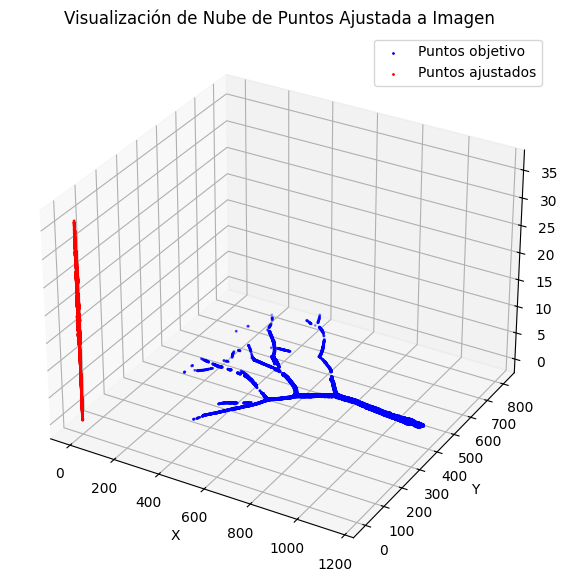

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Configurar la figura 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Visualizar los puntos objetivo (imagen) en color azul
ax.scatter(target_points[:, 0], target_points[:, 1], target_points[:, 2], c='blue', s=1, label="Puntos objetivo")

# Visualizar los puntos generados ajustados en color rojo
ax.scatter(generated_points_xyz[:, 0], generated_points_xyz[:, 1], generated_points_xyz[:, 2], c='red', s=1, label="Puntos ajustados")

# Configurar etiquetas y título
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Visualización de Nube de Puntos Ajustada a Imagen")

# Añadir leyenda
ax.legend()

# Mostrar la visualización
plt.show()
